#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
GC    : 2
Phase : 1

'''

#2. IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#3. DATA LOADING

In [ ]:
cuaca_aus_ori = pd.read_csv('weatherAUS.csv')

In [ ]:
cuaca_aus = cuaca_aus_ori.copy()

In [ ]:
cuaca_aus.shape

(145460, 23)

Terlihat bahwa dataset yang akan diolah berisi 145460 data dengan 23 informasi

#4. DATA CLEANING

In [ ]:
cuaca_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(cuaca_aus.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(cuaca_aus)).round(2)*100
mv

,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


Terkecuali variabel **Date** dan **Location**, tampaknya 
seluruh variabel mengandung missing value dengan jumlah dan presentase yang bervariasi.

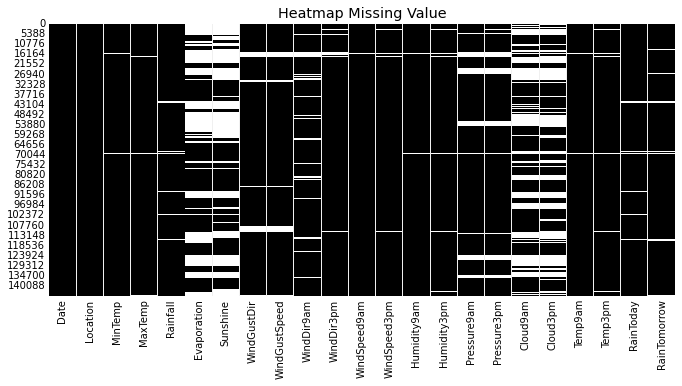

In [ ]:
'''
Visualisasi missing value seluruh variabel pada dataset yang digunakan.
Warna putih mengindikasikan missing value.

'''
plt.figure(figsize=(10,5))
sns.heatmap(cuaca_aus.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()


##ANALISA UNTUK TREATMENT HANDLING MISSING VALUE


#####Sunshine = DROP VARIABEL/KOLOM

Pada variabel Sunshine mengandung missing value dengan presentase menginjak 50% (tepatny 48%) dari total dataset yang dimiliki. **Saya memutuskan untuk menghapus/drop variabel Sunshine dari dataset. Menurut saya variabel yang mengandung missing value diatas 45% presentase-nya sudah tidak tepat jika di imputasi dengan nilai mean/median, dikarenakan jika diisi dengan nilai melalui pendekatan pada data yang ada di variabel tersebut, akibatnya sejumlah besar data berisi nilai yang tidak tepat/sesuai dengan fakta yang ada di lapangan. Yang mana akan mempengaruhi performa model, jika model dilatih dengan data yang tidak tepat dalam jumlah yang banyak. Juga variabel sunshine tidak memiliki pengaruh yang begitu besar dalam proses terjadinya hujan.**

#####Evaporation, Cloud9am dan Cloud3pm = IMPUTASI

Pada variabel **Evaporation**, **Cloud9am** dan **Cloud3pm** mengandung missing value dengan presentase diatas 38%. **Saya memutuskan untuk mengimputasi ketiga variabel ini dengan nilai mean/median disesuaikan dengan distribusi datanya. Dikarenakan nilai yang dikandung dalam ketiga variabel (Evaporasi, keadaan awan di pagi dan sore hari) ini merupakan nilai yang penting karena merupakan faktor penentu yang terlibat langsung dalam proses terjadinya hujan.**

#####RainFall, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm = IMPUTASI

Pada variabel RainFall, WindGustDir (arah hembusan angin) WindGustSpeed (kecepatan hembusana angin), WindDir9am dan WindDir3pm (Arah angin pada pagi dan sore hari), WindSpeed9am dan WindSpeed3pm (kecepatan angin pada pagi dan sore hari), Humidity9am dan Humidity3pm (kelembapan pada pagi dan sore hari), Pressure9am dan Pressure3pm (tekanan pada pagi hari dan sore hari), Temp9am dan Temp3pm (temperatur pada pagi hari dan sore hari). **Saya memutuskan untuk imputasi missing value pada variabel tersebut sesuai dengan distribusi datanya. Dikarenakan nilai yang dikandung dalam beberapa variabel ini merupakan nilai yang penting karena merupakan faktor penentu yang terlibat langsung dalam proses terbentuknya awan dan terjadinya hujan.**

#####MinTemp dan MaxTemp = DROP VARIABEL

Pada variabel MinTemp dan MaxTemp, saya memutuskan untuk menghapus/drop kedua variabel tersebut. Dikarenakan jika diimputasi dengan nilai melalui pendekatan pada data yang ada di kedua variabel tersebut, akibatnya terjadi ketidak sesuaian data, karena nilai pada variabel MinTemp dan MaxTemp dtentukan berdasarkan nilai yang ada variabel Temp9am dan Temp3pm.

#####RainToday dan RainTomorrow = DROP ROWS/BARIS

Saya memutuskan untuk menghapus/drop baris yang mengandung missing value pada kedua variabel tersebut. Menurut saya jika diimputasi kurang tepat treatmentnya, karena variabel ini berisi informasi terjadinya hujan atau tidak berdasarkan variabel pendukung lainnya. Jika diimpute maka nilai pada kedua variabel ini ditentukan hanya berdasarkan data/nilai yang paling banyak muncul pada kedua variabel tersebut. 

##DROP AKAN DILAKUKAN PADA PART DATA CLEANING

In [ ]:
'''
Drop variabel Sunshine, MinTemp dan MaxTemp

'''

drop_columns = cuaca_aus.drop(['Sunshine', 'MinTemp', 'MaxTemp'], axis = 1)
cuaca_aus = drop_columns
cuaca_aus.shape

(145460, 20)

Setelah di drop ketiga variabel diatas, maka jumlah kolom yang dimiliki tersisa 20 kolom

In [ ]:
'''
Drop Rows dengan missing value pada kolom RainToday dan RainTomorrow

'''

drop_rows = cuaca_aus.dropna( how='any',
                              subset=['RainToday', 'RainTomorrow'])
cuaca_aus = drop_rows
cuaca_aus.shape

(140787, 20)

Setelah di drop rows/baris yang mengandung missing value pada variabel RainToday dan RainTomorrow maka data yang kita miliki tersisa 140787 data.

##IMPUTASI AKAN DILAKUKAN PADA PART PREPROCESSING DATA SETELAH DATA DI SPLIT

#5. EDA

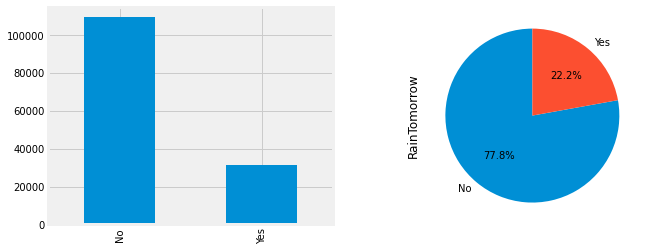

In [ ]:
'''
Visualisasi variabel target (RainTomorrow)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
cuaca_aus['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
cuaca_aus['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel RainTomorrow memiliki 2 value, yaitu Yes and No
*   77.8% dari hasilnya adalah No, dan 22.2% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified cross validation agar menjaga keseimbangan data pada target.





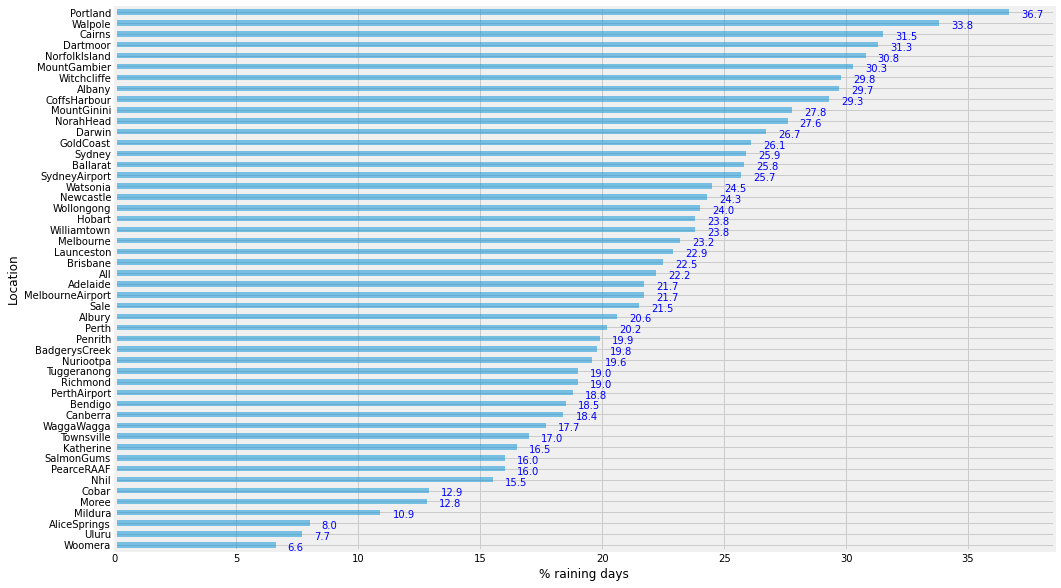

In [ ]:
'''
Kota mana yang intensitas hujannya lebih sering?

'''

#rain_by_location =rain.groupby('Location')['RainTomorrow'].count()/rain['Location'].count()
rain_by_location = pd.crosstab(index=cuaca_aus['Location'], columns=cuaca_aus['RainTomorrow'], values=cuaca_aus['RainTomorrow'], aggfunc='count', margins=True)
rain_by_location['% Yes'] = (rain_by_location['Yes']/rain_by_location['All']).round(3)*100
# rain_by_location.sort_values(by='% Yes', ascending=False)
f, ax = plt.subplots(figsize=(15,10))
rain_by_location['% Yes'].sort_values().plot(kind='barh', alpha=0.5)
ax.set_xlabel ('% raining days')

# Label values 
y = rain_by_location['% Yes'].sort_values().values
for h, v in enumerate(y):
    ax.text(v+0.5 , h-0.5 , round(float(v),1), color='blue')

*   Kota dengan intensitas hujan lebih sering adalah **Portland**
*   Kota dengan intensitas hujan terendah adalah **Woomera**



In [ ]:
'''
Visualisasi hubungan antara kelembapan, tekanan dan hujan di besok hari

'''

fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Humidity9am', y='Pressure3pm', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Dari hasil visualisasi tampaknya peluang turunnya hujan di besok hari semakin besar jika kelembapannya tinggi dan tekanannya rendah

In [ ]:
both_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='Yes') & (cuaca_aus['RainTomorrow']=='Yes')]
both_not_rain =  cuaca_aus.loc[(cuaca_aus['RainToday']=='No') & (cuaca_aus['RainTomorrow']=='No')]
today_rain_tmr_not_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='Yes') & (cuaca_aus['RainTomorrow']=='No')]
today_not_rain_tmr_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='No') & (cuaca_aus['RainTomorrow']=='Yes')]
rain_tmr = cuaca_aus.loc[cuaca_aus['RainTomorrow']=='Yes']

print('both_days_rain:', both_rain['Date'].count())
print('both_days_not_rain:',  both_not_rain['Date'].count())
print('today_rain_tmr_not_rain:', today_rain_tmr_not_rain ['Date'].count())
print('today_not_rain_tmr_rain:', today_not_rain_tmr_rain ['Date'].count())
print('rain_tmr:', rain_tmr['Date'].count())

*   Terlihat bahwa sebanyak 31201 nilai 'Yes' dalam RainTomorrow
*   14597 nilai dari kondisi hujan berdampingan selama 2 hari 
*   Dari informasi ini dapat disimpulkan bahwa jika hari ini hujan, kemungkinan besar besok juga akan turun hujan 





In [ ]:
# Extract `Year` and 'Month' information from Date
cuaca_aus['Year'] = pd.DatetimeIndex(cuaca_aus['Date']).year
cuaca_aus['Month'] = pd.DatetimeIndex(cuaca_aus['Date']).month

rain_month = pd.crosstab(index=cuaca_aus['Month'], columns=cuaca_aus['RainTomorrow'], margins=True)
rain_month['%Yes'] = (rain_month['Yes'] / rain_month['All']).round(3)*100 
rain_month.iloc[:-1,-1].plot(style='.-')
plt.xlabel('Month')
plt.ylabel('% Raining days')

Dari hasil visualisasi terlihat bahwa intensitas hujan lebih sering turun ada pada rentang bulan Juni hingga mendekati Agustus

In [ ]:
'''
Drop variabel Year dan Month

'''

drop_columns = cuaca_aus.drop(['Year', 'Month'], axis = 1)
cuaca_aus = drop_columns
cuaca_aus.shape

###KESIMPULAN DARI ANALYSIS EDA

Kemungkinan besar turun hujan besok, jika:

*   Tingkat kelembapan tinggi (Humidity)
*   Tingkat tekanan rendah (Pressure)
*   Hari ini turun hujan (RainToday is 1)
*   Bulan Juni, Juli, Agustus.





#6. PREPROCESSING DATA

**Saya memutuskan untuk menghapus/drop variabel Date dari dataset. Variabel Date tidak memiliki pengaruh yang begitu besar dalam proses terjadinya hujan. Informasi mengenai keadaan terjadinya hujan atau tidak pada hari ini, terdapat pada variabel RainToday.**

In [ ]:
'''
Drop variabel Date

'''

drop_columns = cuaca_aus.drop(['Date'], axis = 1)
cuaca_aus = drop_columns
cuaca_aus.shape

###6.1 MEMISAHKAN FITUR TARGET, NUMERIK, DAN NON NUMERIK

In [ ]:
'''
Mengubah type variabel RainTomorrow ke numerik agar bisa diliat korelasinya dalam
heatmap

'''

cuaca_aus['RainTomorrow'] = cuaca_aus['RainTomorrow'].map({'Yes' : 1, 'No' : 0})

In [ ]:
target = ['RainTomorrow']
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_cols = [i for i in cuaca_aus.columns if i not in (target + cat_cols)]

###6.2 VISUALISASI DISTRIBUSI DATA PADA FITUR NUMERIK

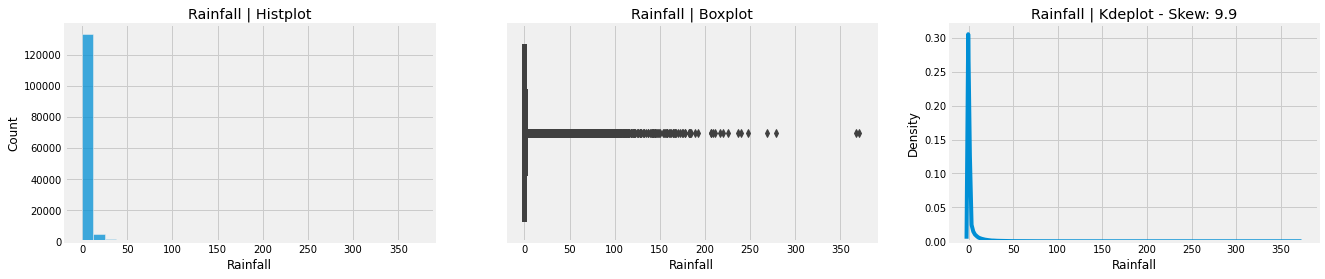

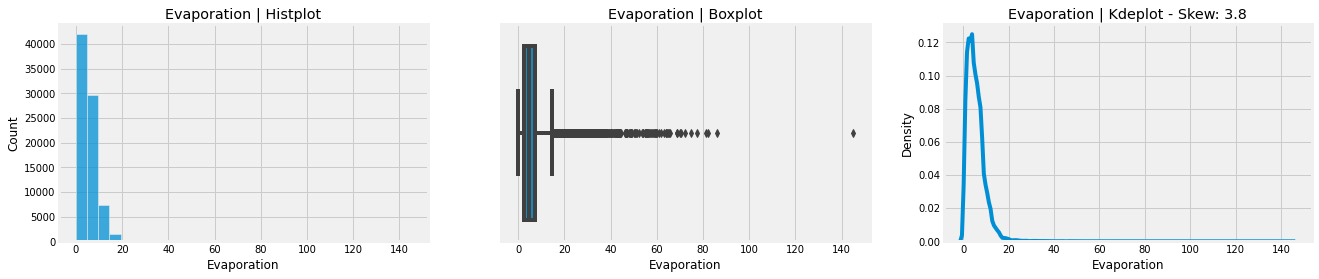

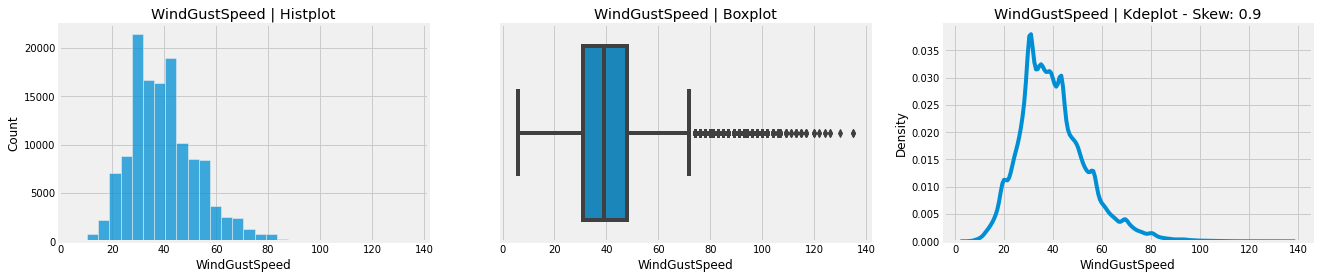

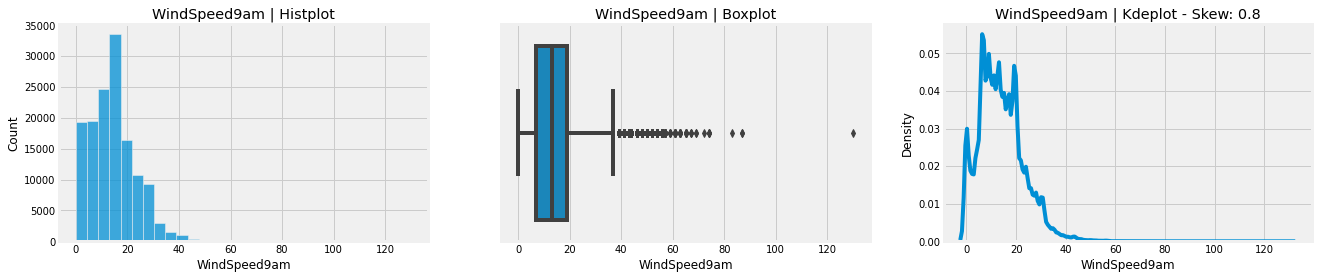

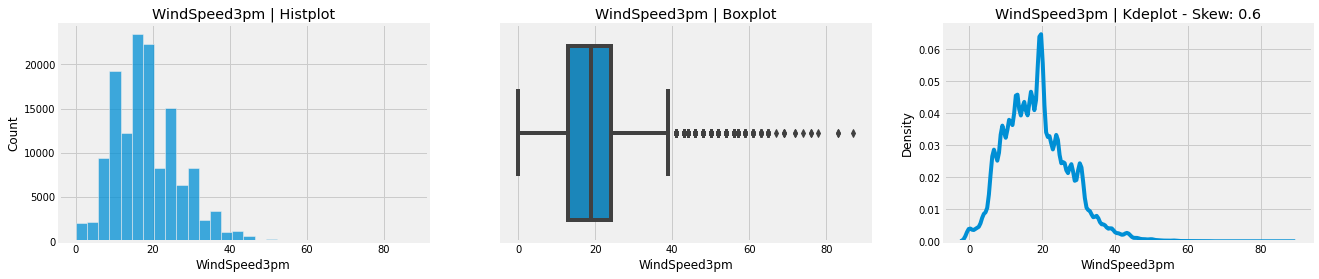

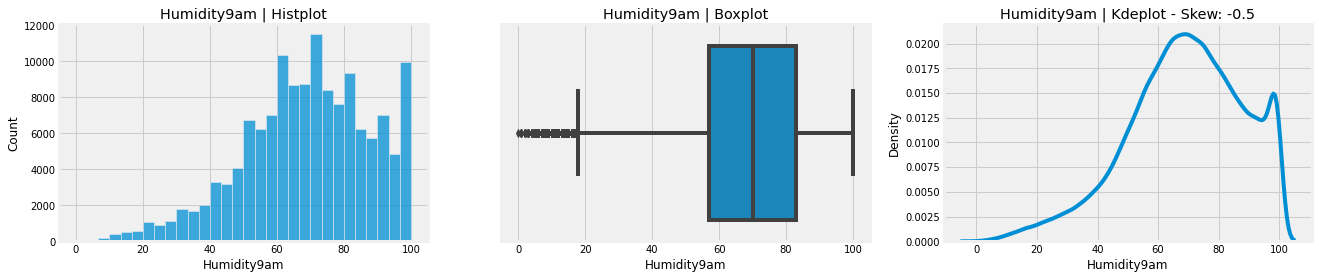

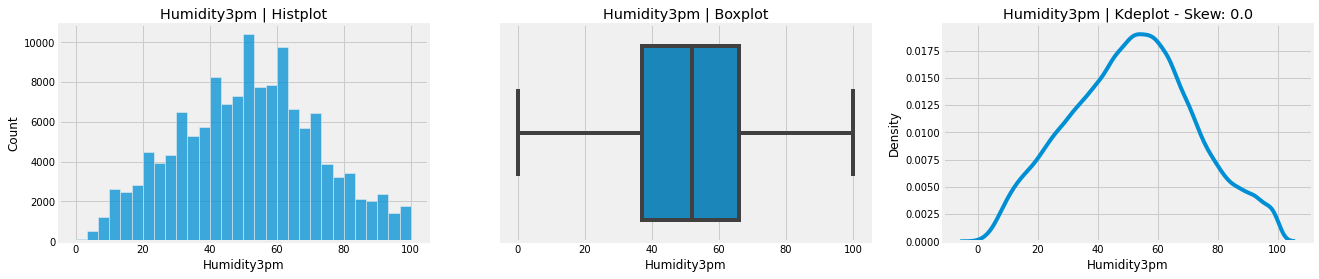

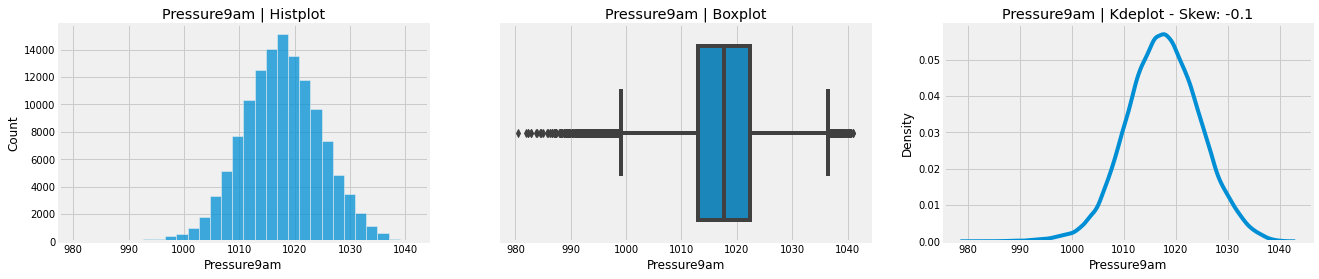

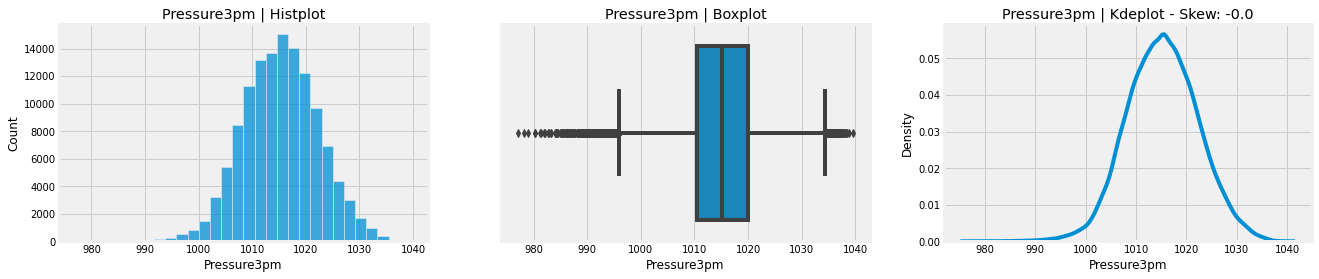

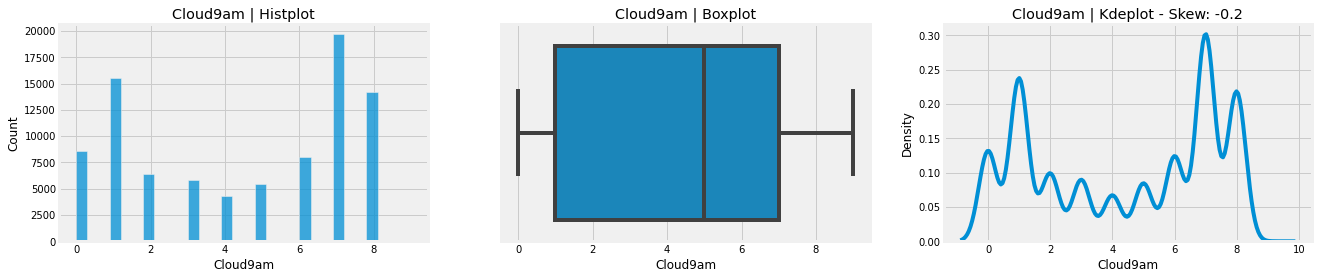

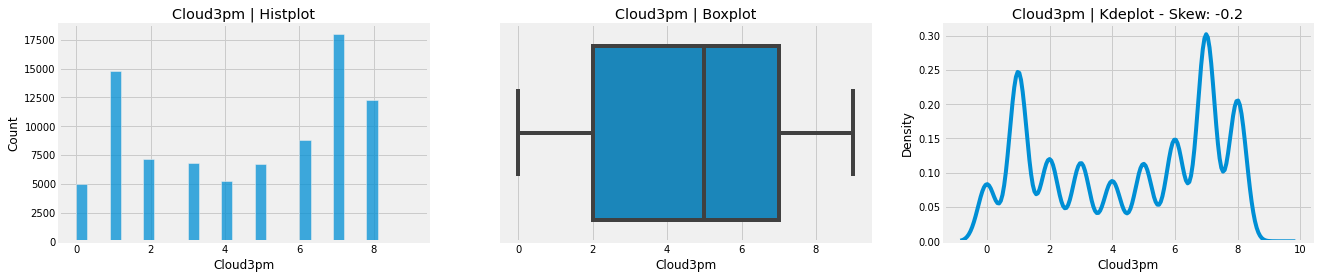

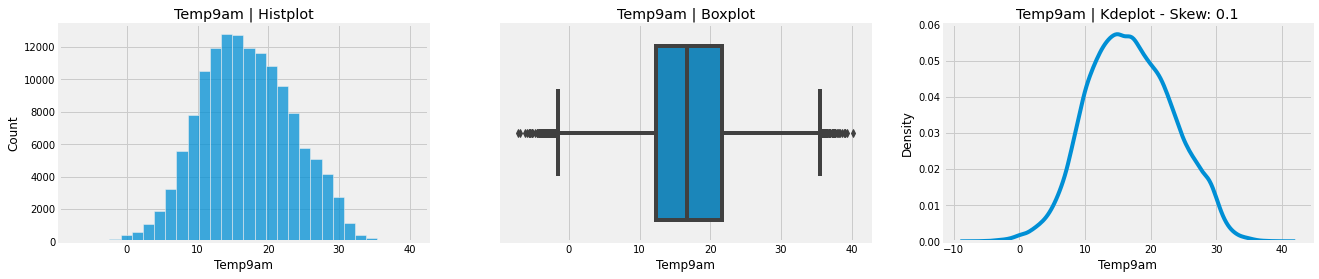

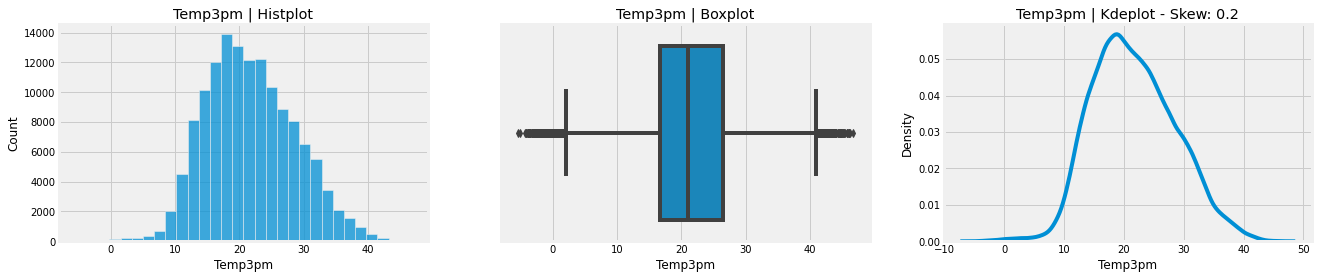

In [ ]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi fitur numerik yang 
ditampilkan

'''


for i in cuaca_aus[num_cols].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=cuaca_aus[i],ax=ax[0], bins=30)
    sns.boxplot(x=cuaca_aus[i], ax=ax[1])
    sns.kdeplot(cuaca_aus[i], ax=ax[2])
    skew_val=round(cuaca_aus[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

Dari distribusi data pada fitur numerik, terlihat bahwa:


*   Variabel RainFall dan Evaporation memiliki distribusi data yang miring/skewed. Variabel lainnya memiliki distribusi data normal dan bimodel. Dari distribusi data pada fitur numerik dapat disimpulkan bahwa lebih tepat jika nilai missing value diimputasi dengan **median**
*   Terdapat banyak variabel yang mengandung outlier. Logistic Regression dan SVM sensitif terhadap outlier, sehingga saya memutuskan akan handle outlier dengan trimming jika presentase outliernya kurang dari 3% dan di capping jika presentase outlier diatas 3% - 25%, diatas 25% tidak akan saya lakukan treatment apapun.


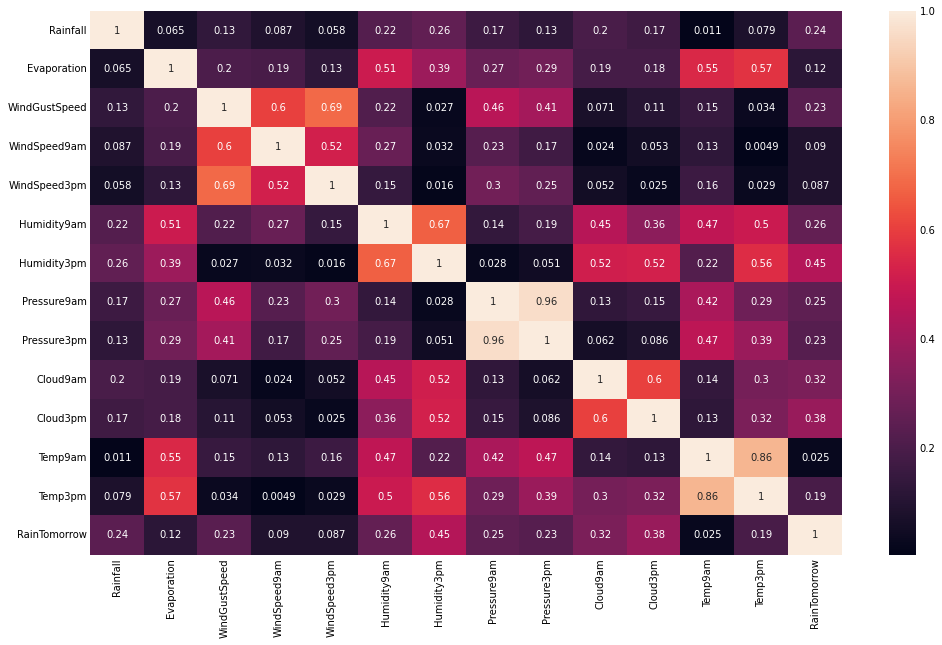

In [ ]:
'''
Heatmap untuk pengecekan correlation fitur numerik terhadap taget

'''

plt.figure(figsize=(15, 10))
sns.heatmap(cuaca_aus[num_cols + target].corr().abs(),  annot=True)
plt.show()



*   Dari matriks korelasi, terlihat bahwa Tem3pm dan Temp9am adalah fitur yang sangat berkorelasi
*   Humidity3pm, Cloud3pm, Cloud9am, Humidity9am, RainFall merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (RainTomorrow)




###6.4 SPLIT DATASET

In [ ]:
X = cuaca_aus.drop('RainTomorrow', axis = 1)
y = cuaca_aus.RainTomorrow

In [ ]:
'''
Sebelum di handing outliernya saya akan convert terlebih dahulu fitur kategorik
dengan LabelEncoder agar memudahkan dalam handling outlier

'''
from sklearn.preprocessing import LabelEncoder

# Convert categorized values to numerical values
le = LabelEncoder()
X[cat_cols] = X[cat_cols].astype('str').apply(le.fit_transform)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

###6.5 HANDLING OUTLIER

**Saya melakukan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3% - 25%. Dan melakukan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier dibawah 3%**

####6.5.1 HANDLING OUTLIER PADA X_TRAIN

In [25]:
'''
Menampilkan presentasi outlier pada X_train

'''
 
for k, v in X_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Location outliers = 0.00%
Column Rainfall outliers = 18.59%
Column Evaporation outliers = 1.40%
Column WindGustDir outliers = 0.00%
Column WindGustSpeed outliers = 2.07%
Column WindDir9am outliers = 0.00%
Column WindDir3pm outliers = 0.00%
Column WindSpeed9am outliers = 1.62%
Column WindSpeed3pm outliers = 1.69%
Column Humidity9am outliers = 1.16%
Column Humidity3pm outliers = 0.00%
Column Pressure9am outliers = 0.84%
Column Pressure3pm outliers = 0.67%
Column Cloud9am outliers = 0.00%
Column Cloud3pm outliers = 0.00%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.50%
Column RainToday outliers = 100.00%


#####CAPPING X_TRAIN

In [26]:
'''
Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%

Column Rainfall outliers = 18.59%

'''

!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Rainfall'])

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)

     |████████████████████████████████| 180 kB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [27]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Rainfall': -1.2000000000000002}
Right Tail Caps :  {'Rainfall': 2.0}


In [28]:
print('Rainfall - Before Capping')
print(X_train.describe())
print('')
print('RainFall - After Capping')
print(X_train_t.describe())

Rainfall - Before Capping
            Location       Rainfall  ...        Temp3pm      RainToday
count  112629.000000  112629.000000  ...  110528.000000  112629.000000
mean       23.726269       2.343813  ...      21.691187       0.222802
std        14.241316       8.451856  ...       6.942104       0.416129
min         0.000000       0.000000  ...      -5.400000       0.000000
25%        11.000000       0.000000  ...      16.600000       0.000000
50%        24.000000       0.000000  ...      21.100000       0.000000
75%        36.000000       0.800000  ...      26.400000       0.000000
max        48.000000     367.600000  ...      46.200000       1.000000

[8 rows x 18 columns]

RainFall - After Capping
            Location       Rainfall  ...        Temp3pm      RainToday
count  112629.000000  112629.000000  ...  110528.000000  112629.000000
mean       23.726269       0.484691  ...      21.691187       0.222802
std        14.241316       0.790996  ...       6.942104       0.416129
mi

In [29]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Rain Fall - Before Capping


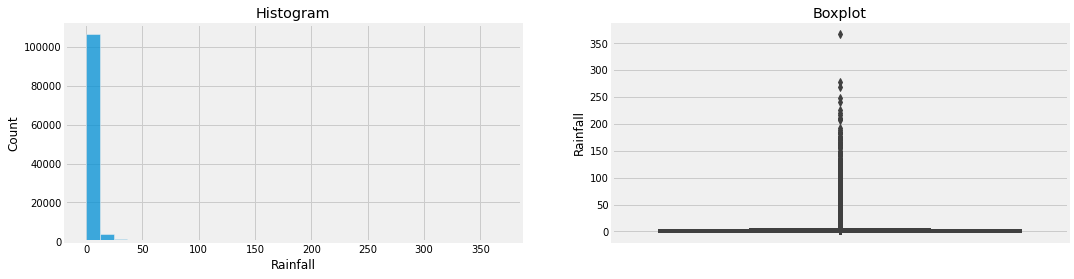

\Rain Fall - After Capping


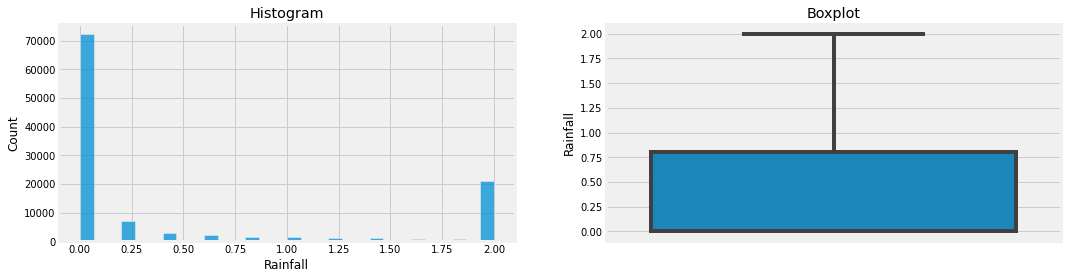

In [30]:
print('Rain Fall - Before Capping')
diagnostic_plots(X_train, 'Rainfall')
print('\Rain Fall - After Capping')
diagnostic_plots(X_train_t, 'Rainfall')

#####TRIMMING X_TRAIN

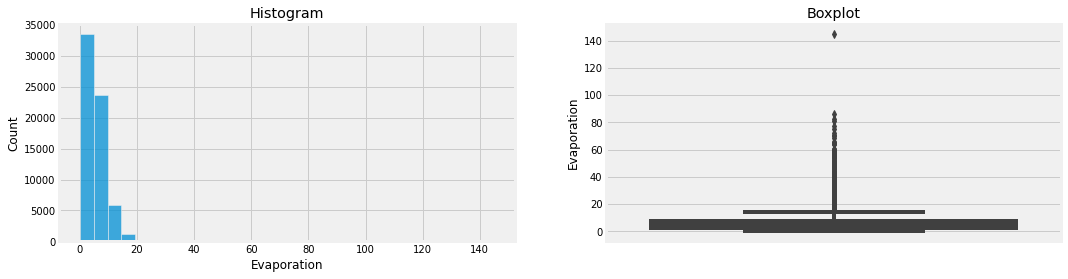

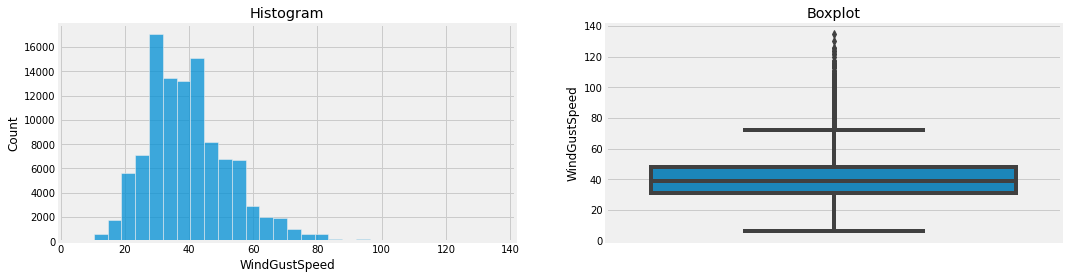

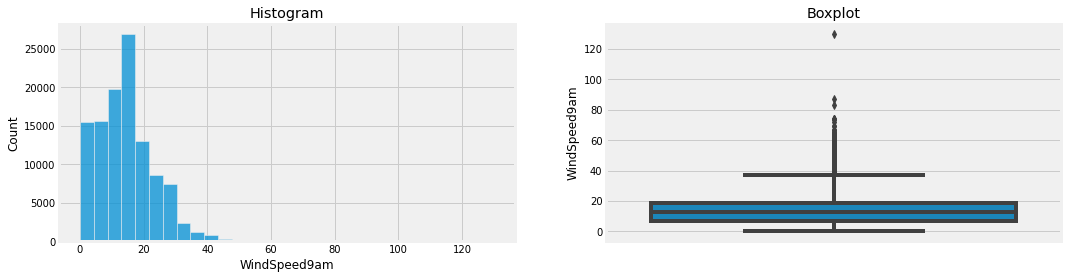

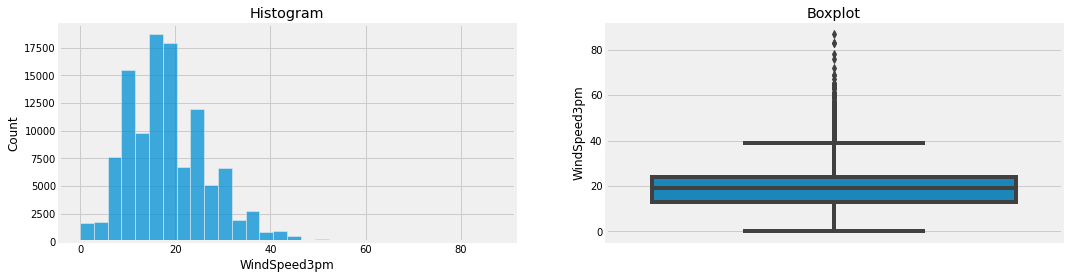

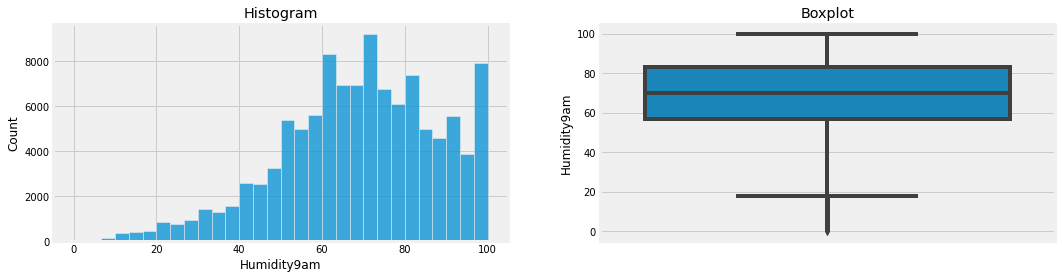

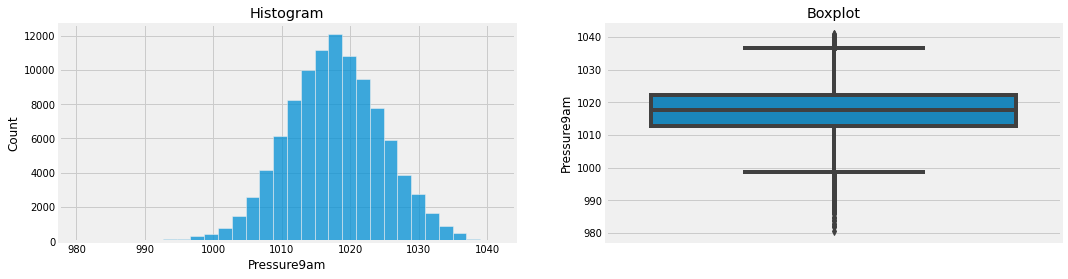

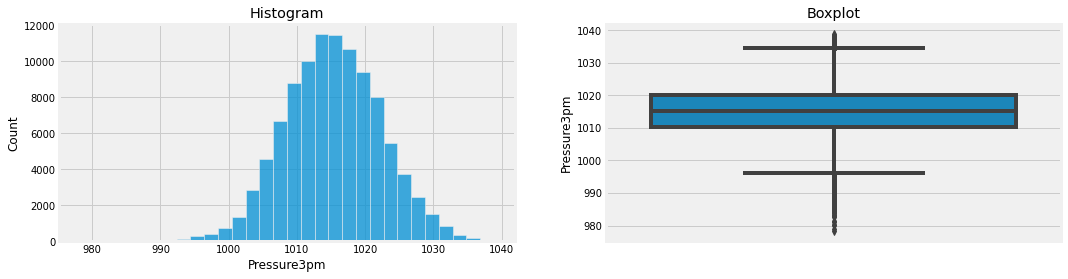

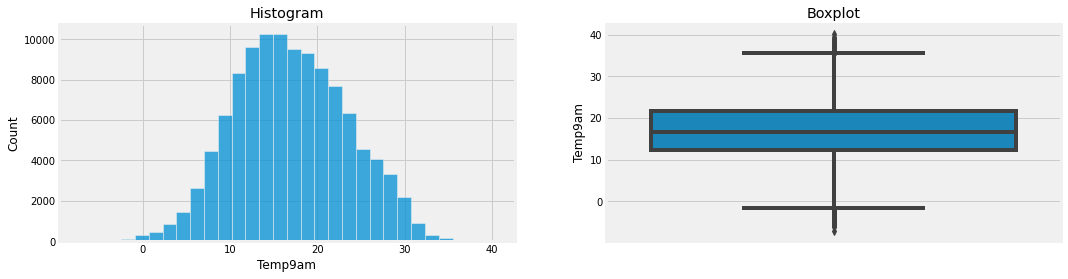

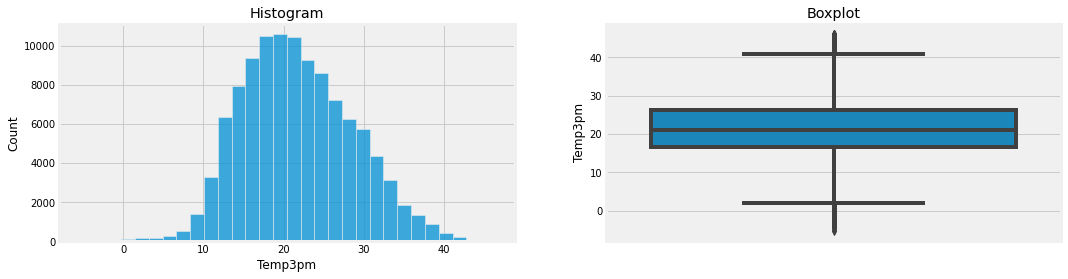

In [31]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier 
dengan presentase outlier sama dengan dan dibawah 3%

olumn Evaporation outliers = 1.40%
Column WindGustSpeed outliers = 2.07%
Column WindSpeed9am outliers = 1.62%
Column WindSpeed3pm outliers = 1.69%
Column Humidity9am outliers = 1.16%
Column Pressure9am outliers = 0.84%
Column Pressure3pm outliers = 0.67%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.50%

'''

diagnostic_plots(X_train, 'Evaporation')
diagnostic_plots(X_train, 'WindGustSpeed')
diagnostic_plots(X_train, 'WindSpeed9am')
diagnostic_plots(X_train, 'WindSpeed3pm')
diagnostic_plots(X_train, 'Humidity9am')
diagnostic_plots(X_train, 'Pressure9am')
diagnostic_plots(X_train, 'Pressure3pm')
diagnostic_plots(X_train, 'Temp9am')
diagnostic_plots(X_train, 'Temp3pm')

In [32]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [33]:
# Limits for `Evaporation`
Evaporation_upper_limit, Evaporation_lower_limit = find_skewed_boundaries(X_train, 'Evaporation', 1.5)
Evaporation_upper_limit, Evaporation_lower_limit

# Limits for `WindGustSpeed`
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit = find_skewed_boundaries(X_train, 'WindGustSpeed', 1.5)
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit

# Limits for `WindSpeed9am`
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit = find_skewed_boundaries(X_train, 'WindSpeed9am', 1.5)
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit

# Limits for `WindSpeed3pm`
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit = find_skewed_boundaries(X_train, 'WindSpeed3pm', 1.5)
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit

# Limits for `Humidity9am`
Humidity9am_upper_limit, Humidity9am_lower_limit = find_skewed_boundaries(X_train, 'Humidity9am', 1.5)
Humidity9am_upper_limit, Humidity9am_lower_limit

# Limits for `Pressure9am`
Pressure9am_upper_limit, Pressure9am_lower_limit = find_skewed_boundaries(X_train, 'Pressure9am', 1.5)
Pressure9am_upper_limit, Pressure9am_lower_limit

# Limits for `Pressure3pm`
Pressure3pm_upper_limit, Pressure3pm_lower_limit = find_skewed_boundaries(X_train, 'Pressure3pm', 1.5)
Pressure3pm_upper_limit, Pressure3pm_lower_limit

# Limits for `Temp9am`
Temp9am_upper_limit, Temp9am_lower_limit = find_skewed_boundaries(X_train, 'Temp9am', 1.5)
Temp9am_upper_limit, Temp9am_lower_limit

# Limits for `Temp3pm`
Temp3pm_upper_limit, Temp3pm_lower_limit = find_skewed_boundaries(X_train, 'Temp3pm', 1.5)
Temp3pm_upper_limit, Temp3pm_lower_limit


print('Evaporation_upper_limit : ', Evaporation_upper_limit)
print('Evaporation_lower_limit : ', Evaporation_lower_limit, '\n')
print('WindGustSpeed_upper_limit : ', WindGustSpeed_upper_limit)
print('WindGustSpeed_lower_limit : ', WindGustSpeed_lower_limit, '\n')
print('WindSpeed9am_upper_limit : ', WindSpeed9am_upper_limit)
print('WindSpeed9am_lower_limit : ', WindSpeed9am_lower_limit, '\n')
print('WindSpeed3pm_upper_limit : ', WindSpeed3pm_upper_limit)
print('WindSpeed3pm_lower_limit : ', WindSpeed3pm_lower_limit, '\n')
print('Humidity9am_upper_limit : ', Humidity9am_upper_limit)
print('Humidity9am_lower_limit : ', Humidity9am_lower_limit, '\n')
print('Pressure9am_upper_limit : ', Pressure9am_upper_limit)
print('Pressure9am_lower_limit : ', Pressure9am_lower_limit, '\n')
print('Pressure3pm_upper_limit : ', Pressure3pm_upper_limit)
print('Pressure3pm_lower_limit : ', Pressure3pm_lower_limit, '\n')
print('Temp9am_upper_limit : ', Temp9am_upper_limit)
print('Temp9am_lower_limit : ', Temp9am_lower_limit, '\n')
print('Temp3pm_upper_limit : ', Temp3pm_upper_limit)
print('Temp3pm_lower_limit : ', Temp3pm_lower_limit)

Evaporation_upper_limit :  14.600000000000001
Evaporation_lower_limit :  -4.600000000000001 

WindGustSpeed_upper_limit :  73.5
WindGustSpeed_lower_limit :  5.5 

WindSpeed9am_upper_limit :  37.0
WindSpeed9am_lower_limit :  -11.0 

WindSpeed3pm_upper_limit :  40.5
WindSpeed3pm_lower_limit :  -3.5 

Humidity9am_upper_limit :  122.0
Humidity9am_lower_limit :  18.0 

Pressure9am_upper_limit :  1036.65
Pressure9am_lower_limit :  998.65 

Pressure3pm_upper_limit :  1034.4
Pressure3pm_lower_limit :  996.0 

Temp9am_upper_limit :  35.550000000000004
Temp9am_lower_limit :  -1.6500000000000004 

Temp3pm_upper_limit :  41.099999999999994
Temp3pm_lower_limit :  1.9000000000000057


In [34]:
index_drop_train = X_train.index[X_train['Evaporation'] > Evaporation_upper_limit]
index_drop_train.nunique()

1572

In [35]:
X_train = X_train.drop(index_drop_train.tolist())
X_train.shape

(111057, 18)

In [36]:
y_train = y_train.drop(index_drop_train.tolist())
y_train.shape

(111057,)

In [37]:
index_drop_train = X_train.index[X_train['WindGustSpeed'] > WindGustSpeed_upper_limit]
index_drop_train.nunique()

2281

In [38]:
X_train = X_train.drop(index_drop_train.tolist())
X_train.shape

(108776, 18)

In [39]:
y_train = y_train.drop(index_drop_train.tolist())
y_train.shape

(108776,)

In [40]:
index_drop_train = X_train.index[X_train['WindSpeed9am'] > WindSpeed9am_upper_limit]
index_drop_train.nunique()

844

In [41]:
X_train = X_train.drop(index_drop_train.tolist())
X_train.shape

(107932, 18)

In [42]:
y_train = y_train.drop(index_drop_train.tolist())
y_train.shape

(107932,)

In [43]:
index_drop_train = X_train.index[X_train['WindSpeed3pm'] > WindSpeed3pm_upper_limit]
index_drop_train.nunique()

1005

In [44]:
X_train = X_train.drop(index_drop_train.tolist())
X_train.shape

(106927, 18)

In [45]:
y_train = y_train.drop(index_drop_train.tolist())
y_train.shape

(106927,)

In [46]:
index_drop_train = X_train.index[X_train['Humidity9am'] > Humidity9am_upper_limit]
index_drop_train.nunique()

0

In [47]:
index_drop_train = X_train.index[X_train['Pressure9am'] > Pressure9am_upper_limit]
index_drop_train.nunique()

252

In [48]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(106675, 18)
(106675,)


In [49]:
index_drop_train = X_train.index[X_train['Pressure3pm'] > Pressure3pm_upper_limit]
index_drop_train.nunique()

73

In [50]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(106602, 18)
(106602,)


In [51]:
index_drop_train = X_train.index[X_train['Temp9am'] > Temp9am_upper_limit]
index_drop_train.nunique()

37

In [52]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(106565, 18)
(106565,)


In [53]:
index_drop_train = X_train.index[X_train['Temp3pm'] > Temp9am_upper_limit]
index_drop_train.nunique()

2619

In [54]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(103946, 18)
(103946,)


Setelah ditrim jumlah X_train sebesar 103946 data dengan 18 variabel.

jumlah y_train sebesar 103946 data

In [55]:
'''
Menampilkan presentasi outlier pada X_test

'''
 
for k, v in X_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Location outliers = 0.00%
Column Rainfall outliers = 18.89%
Column Evaporation outliers = 1.33%
Column WindGustDir outliers = 0.00%
Column WindGustSpeed outliers = 2.23%
Column WindDir9am outliers = 0.00%
Column WindDir3pm outliers = 0.00%
Column WindSpeed9am outliers = 1.64%
Column WindSpeed3pm outliers = 1.81%
Column Humidity9am outliers = 1.09%
Column Humidity3pm outliers = 0.00%
Column Pressure9am outliers = 0.89%
Column Pressure3pm outliers = 0.66%
Column Cloud9am outliers = 0.00%
Column Cloud3pm outliers = 0.00%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.53%
Column RainToday outliers = 100.00%


#####CAPPING X_TEST

In [56]:
'''
Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%

Column Rainfall outliers = 18.89%

'''

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Rainfall'])

windsoriser.fit(X_test)

X_test_t = windsoriser.transform(X_test)

In [57]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Rainfall': -1.2000000000000002}
Right Tail Caps :  {'Rainfall': 2.0}


In [58]:
print('Rainfall - Before Capping')
print(X_test.describe())
print('')
print('RainFall - After Capping')
print(X_test_t.describe())

Rainfall - Before Capping
           Location      Rainfall  ...       Temp3pm     RainToday
count  28158.000000  28158.000000  ...  27635.000000  28158.000000
mean      23.695291      2.374618  ...     21.701165      0.225904
std       14.201921      8.518339  ...      6.920600      0.418184
min        0.000000      0.000000  ...     -3.700000      0.000000
25%       11.000000      0.000000  ...     16.700000      0.000000
50%       24.000000      0.000000  ...     21.100000      0.000000
75%       36.000000      0.800000  ...     26.450000      0.000000
max       48.000000    371.000000  ...     46.700000      1.000000

[8 rows x 18 columns]

RainFall - After Capping
           Location      Rainfall  ...       Temp3pm     RainToday
count  28158.000000  28158.000000  ...  27635.000000  28158.000000
mean      23.695291      0.489850  ...     21.701165      0.225904
std       14.201921      0.795265  ...      6.920600      0.418184
min        0.000000      0.000000  ...     -3.700000  

Rain Fall - Before Capping


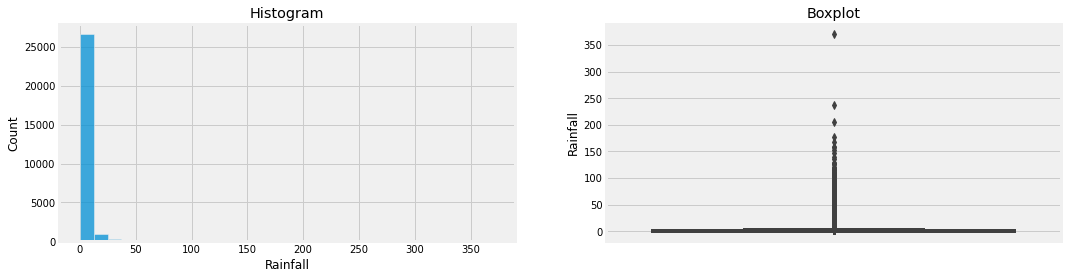

\Rain Fall - After Capping


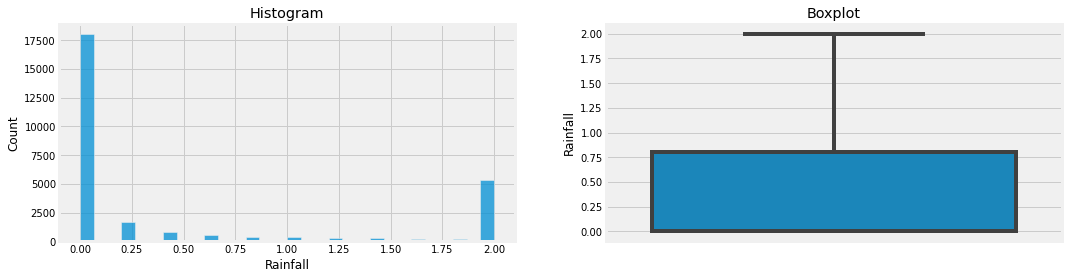

In [59]:
print('Rain Fall - Before Capping')
diagnostic_plots(X_test, 'Rainfall')
print('\Rain Fall - After Capping')
diagnostic_plots(X_test_t, 'Rainfall')

#####TRIMMING X_TEST

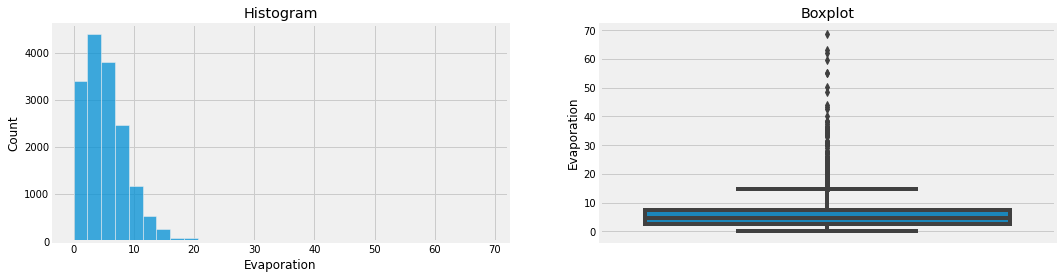

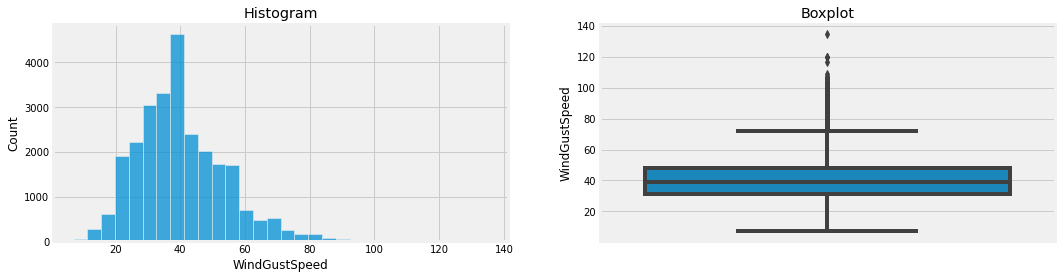

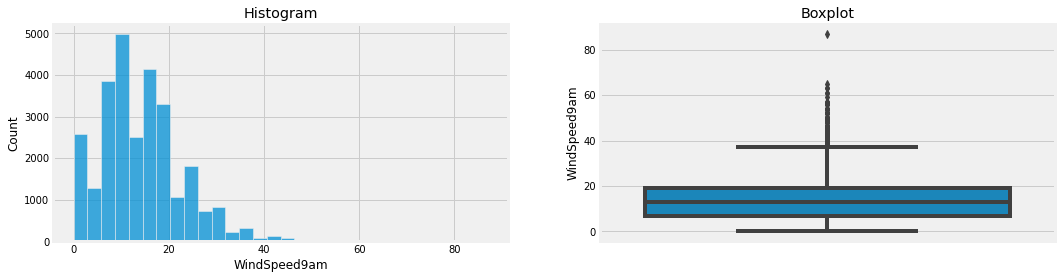

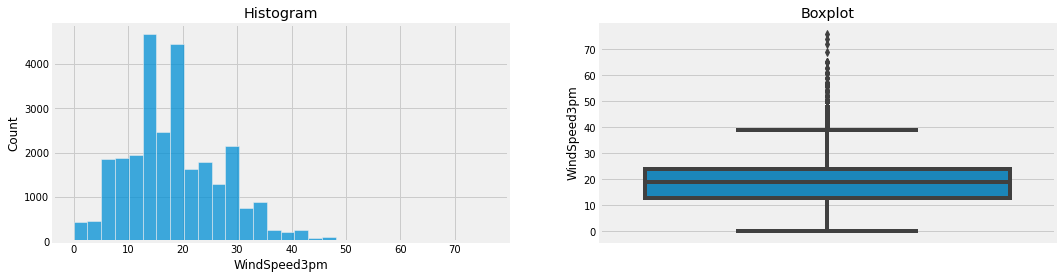

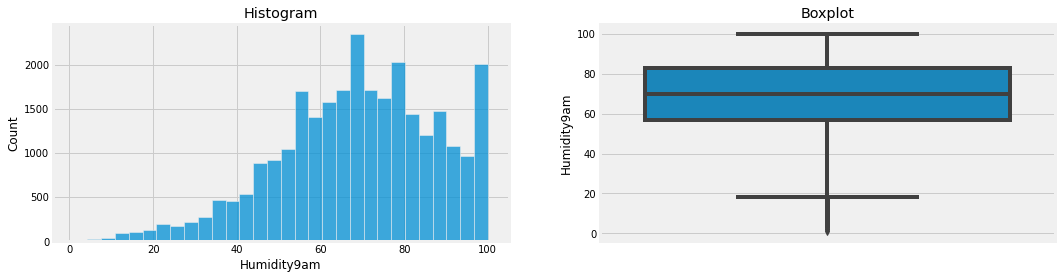

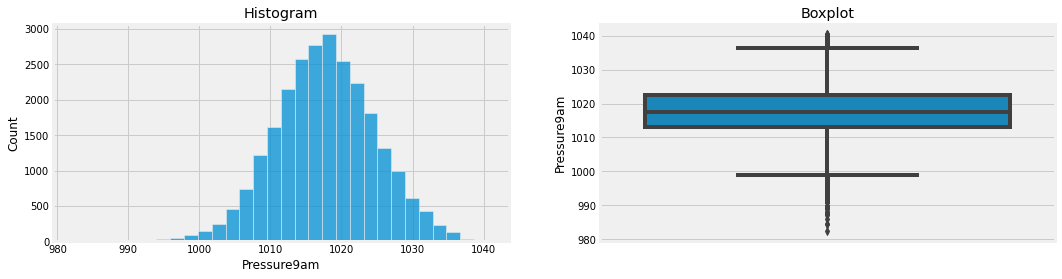

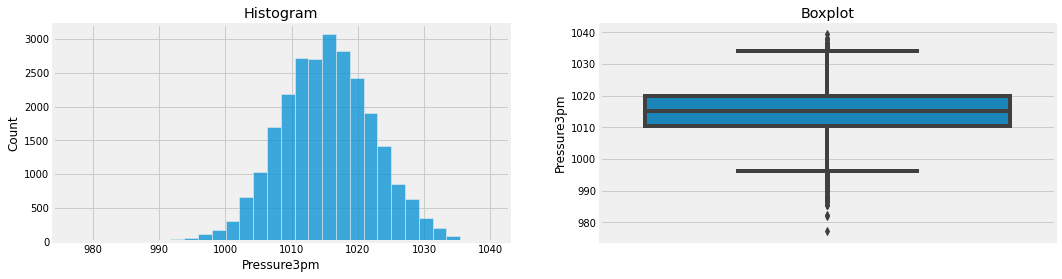

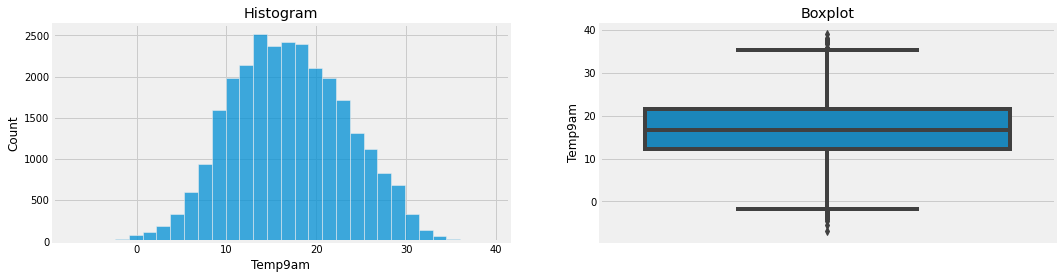

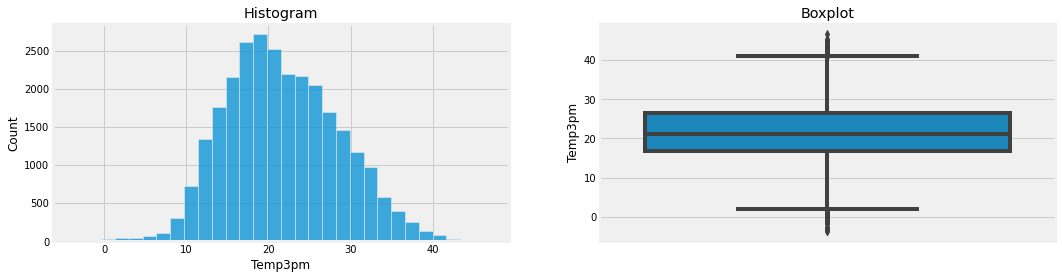

In [60]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier 
dengan presentase outlier sama dengan dan dibawah 3%

Column Evaporation outliers = 1.33%
Column WindGustSpeed outliers = 2.23%
Column WindSpeed9am outliers = 1.64%
Column WindSpeed3pm outliers = 1.81%
Column Humidity9am outliers = 1.09%
Column Pressure9am outliers = 0.89%
Column Pressure3pm outliers = 0.66%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.53%

'''

diagnostic_plots(X_test, 'Evaporation')
diagnostic_plots(X_test, 'WindGustSpeed')
diagnostic_plots(X_test, 'WindSpeed9am')
diagnostic_plots(X_test, 'WindSpeed3pm')
diagnostic_plots(X_test, 'Humidity9am')
diagnostic_plots(X_test, 'Pressure9am')
diagnostic_plots(X_test, 'Pressure3pm')
diagnostic_plots(X_test, 'Temp9am')
diagnostic_plots(X_test, 'Temp3pm')

In [61]:
# Limits for `Evaporation`
Evaporation_upper_limit, Evaporation_lower_limit = find_skewed_boundaries(X_test, 'Evaporation', 1.5)
Evaporation_upper_limit, Evaporation_lower_limit

# Limits for `WindGustSpeed`
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit = find_skewed_boundaries(X_test, 'WindGustSpeed', 1.5)
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit

# Limits for `WindSpeed9am`
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit = find_skewed_boundaries(X_test, 'WindSpeed9am', 1.5)
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit

# Limits for `WindSpeed3pm`
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit = find_skewed_boundaries(X_test, 'WindSpeed3pm', 1.5)
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit

# Limits for `Humidity9am`
Humidity9am_upper_limit, Humidity9am_lower_limit = find_skewed_boundaries(X_test, 'Humidity9am', 1.5)
Humidity9am_upper_limit, Humidity9am_lower_limit

# Limits for `Pressure9am`
Pressure9am_upper_limit, Pressure9am_lower_limit = find_skewed_boundaries(X_test, 'Pressure9am', 1.5)
Pressure9am_upper_limit, Pressure9am_lower_limit

# Limits for `Pressure3pm`
Pressure3pm_upper_limit, Pressure3pm_lower_limit = find_skewed_boundaries(X_test, 'Pressure3pm', 1.5)
Pressure3pm_upper_limit, Pressure3pm_lower_limit

# Limits for `Temp9am`
Temp9am_upper_limit, Temp9am_lower_limit = find_skewed_boundaries(X_test, 'Temp9am', 1.5)
Temp9am_upper_limit, Temp9am_lower_limit

# Limits for `Temp3pm`
Temp3pm_upper_limit, Temp3pm_lower_limit = find_skewed_boundaries(X_test, 'Temp3pm', 1.5)
Temp3pm_upper_limit, Temp3pm_lower_limit


print('Evaporation_upper_limit : ', Evaporation_upper_limit)
print('Evaporation_lower_limit : ', Evaporation_lower_limit, '\n')
print('WindGustSpeed_upper_limit : ', WindGustSpeed_upper_limit)
print('WindGustSpeed_lower_limit : ', WindGustSpeed_lower_limit, '\n')
print('WindSpeed9am_upper_limit : ', WindSpeed9am_upper_limit)
print('WindSpeed9am_lower_limit : ', WindSpeed9am_lower_limit, '\n')
print('WindSpeed3pm_upper_limit : ', WindSpeed3pm_upper_limit)
print('WindSpeed3pm_lower_limit : ', WindSpeed3pm_lower_limit, '\n')
print('Humidity9am_upper_limit : ', Humidity9am_upper_limit)
print('Humidity9am_lower_limit : ', Humidity9am_lower_limit, '\n')
print('Pressure9am_upper_limit : ', Pressure9am_upper_limit)
print('Pressure9am_lower_limit : ', Pressure9am_lower_limit, '\n')
print('Pressure3pm_upper_limit : ', Pressure3pm_upper_limit)
print('Pressure3pm_lower_limit : ', Pressure3pm_lower_limit, '\n')
print('Temp9am_upper_limit : ', Temp9am_upper_limit)
print('Temp9am_lower_limit : ', Temp9am_lower_limit, '\n')
print('Temp3pm_upper_limit : ', Temp3pm_upper_limit)
print('Temp3pm_lower_limit : ', Temp3pm_lower_limit)

Evaporation_upper_limit :  14.600000000000001
Evaporation_lower_limit :  -4.600000000000001 

WindGustSpeed_upper_limit :  73.5
WindGustSpeed_lower_limit :  5.5 

WindSpeed9am_upper_limit :  37.0
WindSpeed9am_lower_limit :  -11.0 

WindSpeed3pm_upper_limit :  40.5
WindSpeed3pm_lower_limit :  -3.5 

Humidity9am_upper_limit :  122.0
Humidity9am_lower_limit :  18.0 

Pressure9am_upper_limit :  1036.5
Pressure9am_lower_limit :  998.9000000000001 

Pressure3pm_upper_limit :  1034.3125
Pressure3pm_lower_limit :  996.2125000000001 

Temp9am_upper_limit :  35.45
Temp9am_lower_limit :  -1.7500000000000018 

Temp3pm_upper_limit :  41.075
Temp3pm_lower_limit :  2.0749999999999993


In [62]:
index_drop_test = X_test.index[X_test['Evaporation'] > Evaporation_upper_limit]
index_drop_test.nunique()

375

In [63]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(27783, 18)
(27783,)


In [64]:
index_drop_test = X_test.index[X_test['WindGustSpeed'] > WindGustSpeed_upper_limit]
index_drop_test.nunique()

614

In [65]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(27169, 18)
(27169,)


In [66]:
index_drop_test = X_test.index[X_test['WindSpeed9am'] > WindSpeed9am_upper_limit]
index_drop_test.nunique()

196

In [67]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(26973, 18)
(26973,)


In [68]:
index_drop_test = X_test.index[X_test['WindSpeed3pm'] > WindSpeed3pm_upper_limit]
index_drop_test.nunique()

242

In [69]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(26731, 18)
(26731,)


In [70]:
index_drop_test = X_test.index[X_test['Humidity9am'] > Humidity9am_upper_limit]
index_drop_test.nunique()

0

In [71]:
index_drop_test = X_test.index[X_test['Pressure9am'] > Pressure9am_upper_limit]
index_drop_test.nunique()

60

In [72]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(26671, 18)
(26671,)


In [73]:
index_drop_test = X_test.index[X_test['Pressure3pm'] > Pressure3pm_upper_limit]
index_drop_test.nunique()

13

In [74]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(26658, 18)
(26658,)


In [75]:
index_drop_test = X_test.index[X_test['Temp9am'] > Temp9am_upper_limit]
index_drop_test.nunique()

11

In [76]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(26647, 18)
(26647,)


In [77]:
index_drop_test = X_test.index[X_test['Temp3pm'] > Temp3pm_upper_limit]
index_drop_test.nunique()

45

In [78]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(26602, 18)
(26602,)


Setelah ditrim jumlah X_train sebesar 26602 data dengan 18 variabel.

jumlah y_train sebesar 26602 data

###6.6 HANDLING (IMPUTATION) MISSING VALUE

In [79]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
X_train.

'''

mv_train = pd.DataFrame(X_train.isnull().sum(), columns=['No. of missing values'])
mv_train['% missing_values'] = (mv_train/len(X_train)).round(2)*100
mv_train

,No. of missing values,% missing_values
Location,0,0.0
Rainfall,0,0.0
Evaporation,44728,43.0
WindGustDir,0,0.0
WindGustSpeed,6967,7.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,818,1.0
WindSpeed3pm,1953,2.0
Humidity9am,1136,1.0


In [81]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
X_test.

'''

mv_test = pd.DataFrame(X_test.isnull().sum(), columns=['No. of missing values'])
mv_test['% missing_values'] = (mv_test/len(X_test)).round(2)*100
mv_test

,No. of missing values,% missing_values
Location,0,0.0
Rainfall,0,0.0
Evaporation,11366,43.0
WindGustDir,0,0.0
WindGustSpeed,1751,7.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,214,1.0
WindSpeed3pm,495,2.0
Humidity9am,293,1.0


Missing value hanya akan dihandle pada fitur yang dipilih, dan akan digunakan untuk melatih model dan menguji performa model

**Dari hasil matriks korelasi terlihat bahwa Humidity3pm, Cloud3pm, Cloud9am, Humidity9am, RainFall merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (RainTomorrow) dibandingkan variabel lainnya. Sehingga saya memutuskan untuk menggunakan 5 fitur numerik ini karena memiliki nilai korelasi tertinggi terhadap target.**

In [82]:
num_feature_train = X_train[num_cols].loc[:, ['Humidity3pm', 'Cloud3pm', 'Cloud9am', 'Humidity9am', 'Rainfall']]
num_feature_test = X_test[num_cols].loc[:, ['Humidity3pm', 'Cloud3pm', 'Cloud9am', 'Humidity9am', 'Rainfall']]

X_train_num = num_feature_train
X_test_num = num_feature_test

print(X_train_num.isna().sum())
print(X_test_num.isna().sum())

Humidity3pm     2675
Cloud3pm       41815
Cloud9am       39135
Humidity9am     1136
Rainfall           0
dtype: int64
Humidity3pm      658
Cloud3pm       10687
Cloud9am       10028
Humidity9am      293
Rainfall           0
dtype: int64


In [83]:
# Impute missing values for numerical features in train
median_values_train = X_train_num.median()
X_train_num = X_train_num.fillna(value=median_values_train)
X_train_num.isna().sum()

Humidity3pm    0
Cloud3pm       0
Cloud9am       0
Humidity9am    0
Rainfall       0
dtype: int64

In [84]:
# Impute missing values for numerical features in test
median_values_test = X_test_num.median()
X_test_num = X_test_num.fillna(value=median_values_test)
X_test_num.isna().sum()

Humidity3pm    0
Cloud3pm       0
Cloud9am       0
Humidity9am    0
Rainfall       0
dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

**Saya memutuskan untuk menggunakan hanya dua fitur pada fitur kategorik, yaitu Location dan RainToday. Dikarenakan berdasarkan hasil analisis pada EDA terlihat bahwa kemungkinan turunnya hujan besok lebih besar jika terjadi hujan pada hari ini. Dan Lokasi turunnya hujan menjadi penentu besar kecilnya turun hujan di besok hari, karena berdasarkan hasil analisis EDA ada beberapa lokasi yang memiliki intensitas turun hujan lebih sering.**

In [86]:
cat_feature_train = X_train[cat_cols].loc[:, ['Location', 'RainToday']]
cat_feature_test = X_test[cat_cols].loc[:, ['Location', 'RainToday']]

X_train_cat = cat_feature_train
X_test_cat = cat_feature_test

print(X_train_cat.isna().sum())
print(X_test_cat.isna().sum())

Location     0
RainToday    0
dtype: int64
Location     0
RainToday    0
dtype: int64


Tidak terdapat missing value pada fitur kategorik

In [87]:
processed_data_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train = processed_data_train
X_train

array([[ 2.16191923e+00,  1.55690704e+00,  1.45429517e+00, ...,
        -1.08887233e-01,  2.80000000e+01,  1.00000000e+00],
       [ 2.36564642e+00,  1.37490890e-01,  1.41516921e-01, ...,
        -5.93171251e-02,  2.30000000e+01,  1.00000000e+00],
       [ 1.44887407e+00,  1.55690704e+00,  1.45429517e+00, ...,
         3.98230909e-02,  3.00000000e+00,  1.00000000e+00],
       ...,
       [-8.43056830e-01, -2.22820270e+00, -2.04644683e+00, ...,
        -2.82382611e-01,  3.20000000e+01,  0.00000000e+00],
       [ 2.27837306e-02,  1.37490890e-01,  1.41516921e-01, ...,
        -2.32812503e-01,  4.00000000e+00,  0.00000000e+00],
       [-4.86534246e-01,  1.37490890e-01,  1.41516921e-01, ...,
        -2.82382611e-01,  4.00000000e+01,  0.00000000e+00]])

In [88]:
processed_data_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test = processed_data_test
X_test

array([[ 0.48116991,  0.13749089,  0.14151692, ..., -0.25759756,
        12.        ,  0.        ],
       [ 0.58303351,  0.13749089,  0.14151692, ..., -0.2328125 ,
        47.        ,  0.        ],
       [ 0.6339653 ,  0.13749089,  0.14151692, ..., -0.28238261,
         4.        ,  0.        ],
       ...,
       [-0.33373885, -0.80878654, -1.60885408, ...,  0.11417825,
        29.        ,  1.        ],
       [ 1.29607867,  1.08376833,  1.01670242, ..., -0.28238261,
         3.        ,  0.        ],
       [-0.07907986,  1.55690704,  1.45429517, ..., -0.28238261,
        21.        ,  0.        ]])

#7. PENDEFINISIAN MODEL DAN PELATIHAN MODEL

###7.1 LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression

#fitting training data to model
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

###7.2 SVM

In [90]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

#8. EVALUASI MODEL

###8.1 LOGISTIC REGRESSION

In [91]:
y_pred_log = logr.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score
print(confusion_matrix(y_pred_log, y_test))

[[19840  3307]
 [ 1034  2421]]


Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 19840 dan 3307 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 2412 dan 1034 terprediksi salah sebagai 0 (No)



In [93]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     20874
           1       0.70      0.42      0.53      5728

    accuracy                           0.84     26602
   macro avg       0.78      0.69      0.71     26602
weighted avg       0.82      0.84      0.82     26602



Pada classification report model Logistic Regression terlihat bahwa:
*   Precision untuk kelas 0 sebesar 85%, untuk kelas 1 sebesar 70%
*   Recall untuk kelas 0 sebesar 95%, untuk kelas 1 sebesar 42%
*   F1 score untuk kelas 0 sebesar 90%, untuk kelas 1 sebesar 53%




In [94]:
print(accuracy_score(y_pred_log, y_test))
print(recall_score(y_pred_log, y_test))

0.836816780693181
0.7007235890014472


Pada evaluasi model Logistis Regression dihasilkan:
*   Akurasi model sebesar 83.68%
*   Recall model sebesar 70.07%

Pada kasus ini saya menempatkan diri sebagai seorang pekerja kantoran dan menurut saya nilai Recall lebih diperhatikan karena lebih baik terprediksi besok akan turun hujan namun tidak hujan, ketimbangan terprediksi besok tidak turun hujan namun turun hujan.



###8.2 SVM

In [95]:
y_pred = svm.predict(X_test)

In [96]:
print(confusion_matrix(y_pred, y_test))

[[20107  3570]
 [  767  2158]]


Pada hasil confussion matrix model SVM terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 20107 dan 3570 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 2158 dan 767 terprediksi salah sebagai 0 (No)



In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     20874
           1       0.74      0.38      0.50      5728

    accuracy                           0.84     26602
   macro avg       0.79      0.67      0.70     26602
weighted avg       0.83      0.84      0.82     26602



Pada classification report model SVM terlihat bahwa:
*   Precision untuk kelas 0 sebesar 85%, untuk kelas 1 sebesar 74%
*   Recall untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 38%
*   F1 score untuk kelas 0 sebesar 90%, untuk kelas 1 sebesar 50%

In [98]:
print(accuracy_score(y_pred, y_test))
print(recall_score(y_pred, y_test))

0.836967145327419
0.7377777777777778


Pada evaluasi model SVM dihasilkan:
*   Akurasi model sebesar 83.70%
*   Recall model sebesar 73.77%

Pada kasus ini saya menempatkan diri sebagai seorang pekerja kantoran dan menurut saya nilai Recall lebih diperhatikan karena lebih baik terprediksi besok akan turun hujan namun tidak hujan, ketimbangan terprediksi besok tidak turun hujan namun turun hujan.


#9. MODEL INFERENCE

###9.1 LOGISTIC REGRESSION

In [99]:
print(cuaca_aus['Location'].unique())
print(X['Location'].unique())
print(cuaca_aus['RainToday'].unique())
print(X['RainToday'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
[ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
['No' 'Yes']
[0 1]


Pada data baru diketahui bahwa:
*   Di kota Cobar (Location = 10) dengan status pada hari ini turun hujan (RainToday = 1)
*   Kelembapan pada sore hari (Humidity3pm) sebesar 18.0 keadaan awan pada sore hari(Cloud3pm) sebesar 3.0 kelembapan pada pagi hari (Humidity9am) sebesar 41.0, keadaan awan pada pagi hari (Cloud9am) sebesar 6.0, turun hujan (Rainfall) sebesar 0.8

**Apakah besok akan turun hujan di kota Cobar?**

In [100]:
pred_data_num = [[18.0, 3.0, 41.0, 6.0, 0.8]]
num = scaler.transform(pred_data_num)
pred_data_cat = [['10', '1']]

In [102]:
predict_data = np.concatenate([num, pred_data_cat], axis=1)
result = logr.predict(predict_data)
print('Status turun hujan besok hari', result)

Status turun hujan besok hari [0]


Hasil prediksi pada model logistic regression menunjukkan bahwa tidak akan turun hujan di kota Cobar pada besok hari.

###9.2 SVM

Pada data baru diketahui bahwa:
*   Di kota Cobar (Location = 10) dengan status pada hari ini turun hujan (RainToday = 1)
*   Kelembapan pada sore hari (Humidity3pm) sebesar 18.0 keadaan awan pada sore hari(Cloud3pm) sebesar 3.0 kelembapan pada pagi hari (Humidity9am) sebesar 41.0, keadaan awan pada pagi hari (Cloud9am) sebesar 6.0, turun hujan (Rainfall) sebesar 0.8

**Apakah besok akan turun hujan di kota Cobar?**

In [103]:
result = svm.predict(predict_data)
print('Status turun hujan besok hari', result)

Status turun hujan besok hari [0]


Hasil prediksi pada model SVM menunjukkan hasil yang sama bahwa tidak akan turun hujan di kota Cobar pada besok hari.

#10. KESIMPULAN

###10.1 MODEL ANALISIS


#####10.1.1 LOGISTIC REGRESSION

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 19840 dan 3307 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 2412 dan 1034 terprediksi salah sebagai 0 (No)



Pada classification report model Logistic Regression terlihat bahwa:
*   Precision untuk kelas 0 sebesar 85%, untuk kelas 1 sebesar 70%
*   Recall untuk kelas 0 sebesar 95%, untuk kelas 1 sebesar 42%
*   F1 score untuk kelas 0 sebesar 90%, untuk kelas 1 sebesar 53%

Pada evaluasi model Logistis Regression dihasilkan:
*   Akurasi model sebesar 83.68%
*   Recall model sebesar 70.07%

**Pada kasus ini saya menempatkan diri sebagai seorang pekerja kantoran dan menurut saya nilai Recall lebih diperhatikan karena lebih baik terprediksi besok akan turun hujan namun tidak hujan, ketimbangan terprediksi besok tidak turun hujan namun turun hujan.**



#####10.1.2 SVM

Pada hasil confussion matrix model SVM terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 20107 dan 3570 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 2158 dan 767 terprediksi salah sebagai 0 (No)



Pada classification report model SVM terlihat bahwa:
*   Precision untuk kelas 0 sebesar 85%, untuk kelas 1 sebesar 74%
*   Recall untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 38%
*   F1 score untuk kelas 0 sebesar 90%, untuk kelas 1 sebesar 50%

Pada evaluasi model SVM dihasilkan:
*   Akurasi model sebesar 83.70%
*   Recall model sebesar 73.77%

**Pada kasus ini saya menempatkan diri sebagai seorang pekerja kantoran dan menurut saya nilai Recall lebih diperhatikan karena lebih baik terprediksi besok akan turun hujan namun tidak hujan, ketimbangan terprediksi besok tidak turun hujan namun turun hujan.**


#####10.1.3 WHICH ONE BETTER FOR THIS CASE?

Dilihat dari hasil evaluasi antar kedua model terlihat bahwa selisih akurasi antar kedua model sangat kecil, yaitu:
*   Akurasi model Logistic Regression sebesar 83.68%
*   Akurasi model SVM sebesar 83.70%

Karena pada kasus ini nilai recall lebih diperhatikan, dapat dilihat selisih nilai recall antar kedua model cukup terlihat, yaitu:

*   Recall model Logistic Regression sebesar 70.07%
*   Recall model SVM sebesar 73.77%

**Sehingga untuk kasus ini saya menyimpulkan bahwa model SVM lebih tepat digunakan karena menghasilkan nilai akurasi dan recall yang lebih baik dibandingkan model Logistic Regression.**



#####10.1.4 MODEL INFERENCE

Pada data baru diketahui bahwa:
*   Di kota Cobar (Location = 10) dengan status pada hari ini turun hujan (RainToday = 1)
*   Kelembapan pada sore hari (Humidity3pm) sebesar 18.0 keadaan awan pada sore hari(Cloud3pm) sebesar 3.0 kelembapan pada pagi hari (Humidity9am) sebesar 41.0, keadaan awan pada pagi hari (Cloud9am) sebesar 6.0, turun hujan (Rainfall) sebesar 0.8

**Apakah besok akan turun hujan di kota Cobar?**

**Kedua model yang telah dibangun memiliki hasil prediksi yang sama. Dengan keadaan yang ada pada data prediksi model logistic regression dan SVM memprediksi bahwa pada besok hari tidak akan turun hujan pada kota Cobar**

###10.2 OVERALL ANALYSIS

#####10.2.1 DATA CLEANING

Sunshine = DROP VARIABEL/KOLOM

Pada variabel Sunshine mengandung missing value dengan presentase menginjak 50% (tepatny 48%) dari total dataset yang dimiliki. **Saya memutuskan untuk menghapus/drop variabel Sunshine dari dataset. Menurut saya variabel yang mengandung missing value diatas 45% presentase-nya sudah tidak tepat jika di imputasi dengan nilai mean/median, dikarenakan jika diisi dengan nilai melalui pendekatan pada data yang ada di variabel tersebut, akibatnya sejumlah besar data berisi nilai yang tidak tepat/sesuai dengan fakta yang ada di lapangan. Yang mana akan mempengaruhi performa model, jika model dilatih dengan data yang tidak tepat dalam jumlah yang banyak. Juga variabel sunshine tidak memiliki pengaruh yang begitu besar dalam proses terjadinya hujan.**

Evaporation, Cloud9am dan Cloud3pm = IMPUTASI

Pada variabel **Evaporation**, **Cloud9am** dan **Cloud3pm** mengandung missing value dengan presentase diatas 38%. **Saya memutuskan untuk mengimputasi ketiga variabel ini dengan nilai mean/median disesuaikan dengan distribusi datanya. Dikarenakan nilai yang dikandung dalam ketiga variabel (Evaporasi, keadaan awan di pagi dan sore hari) ini merupakan nilai yang penting karena merupakan faktor penentu yang terlibat langsung dalam proses terjadinya hujan.**

RainFall, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm = IMPUTASI

Pada variabel RainFall, WindGustDir (arah hembusan angin) WindGustSpeed (kecepatan hembusana angin), WindDir9am dan WindDir3pm (Arah angin pada pagi dan sore hari), WindSpeed9am dan WindSpeed3pm (kecepatan angin pada pagi dan sore hari), Humidity9am dan Humidity3pm (kelembapan pada pagi dan sore hari), Pressure9am dan Pressure3pm (tekanan pada pagi hari dan sore hari), Temp9am dan Temp3pm (temperatur pada pagi hari dan sore hari). **Saya memutuskan untuk imputasi missing value pada variabel tersebut sesuai dengan distribusi datanya. Dikarenakan nilai yang dikandung dalam beberapa variabel ini merupakan nilai yang penting karena merupakan faktor penentu yang terlibat langsung dalam proses terbentuknya awan dan terjadinya hujan.**

MinTemp dan MaxTemp = DROP VARIABEL

Pada variabel MinTemp dan MaxTemp, saya memutuskan untuk menghapus/drop kedua variabel tersebut. Dikarenakan jika diimputasi dengan nilai melalui pendekatan pada data yang ada di kedua variabel tersebut, akibatnya terjadi ketidak sesuaian data, karena nilai pada variabel MinTemp dan MaxTemp dtentukan berdasarkan nilai yang ada variabel Temp9am dan Temp3pm.

RainToday dan RainTomorrow = DROP ROWS/BARIS

Saya memutuskan untuk menghapus/drop baris yang mengandung missing value pada kedua variabel tersebut. Menurut saya jika diimputasi kurang tepat treatmentnya, karena variabel ini berisi informasi terjadinya hujan atau tidak berdasarkan variabel pendukung lainnya. Jika diimpute maka nilai pada kedua variabel ini ditentukan hanya berdasarkan data/nilai yang paling banyak muncul pada kedua variabel tersebut. 

#####10.2.2 EDA

*   Target dari variabel RainTomorrow memiliki 2 value, yaitu Yes and No
*   77.8% dari hasilnya adalah No, dan 22.2% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga saya menggunakan stratified cross validation agar menjaga keseimbangan data pada target saat proses split data.

Kemungkinan besar turun hujan besok, jika:

*   Tingkat kelembapan tinggi (Humidity)
*   Tingkat tekanan rendah (Pressure)
*   Hari ini turun hujan (RainToday is 1)
*   Bulan Juni, Juli, Agustus.


Kota dengan intensitas hujan lebih sering adalah **Portland**

Kota dengan intensitas hujan terendah adalah **Woomera**


#####10.2.3 HANDLING OUTLIER

**Saya melakukan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3% - 25%. Dan melakukan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier dibawah 3%**

#####10.2.4 FEATURE SELECTION

**Dari hasil matriks korelasi terlihat bahwa Humidity3pm, Cloud3pm, Cloud9am, Humidity9am, RainFall merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (RainTomorrow) dibandingkan variabel lainnya. Sehingga saya memutuskan untuk menggunakan 5 fitur numerik ini karena memiliki nilai korelasi tertinggi terhadap target.**

**Saya memutuskan untuk menggunakan hanya dua fitur pada fitur kategorik, yaitu Location dan RainToday. Dikarenakan berdasarkan hasil analisis pada EDA terlihat bahwa kemungkinan turunnya hujan besok lebih besar jika terjadi hujan pada hari ini. Dan Lokasi turunnya hujan menjadi penentu besar kecilnya turun hujan di besok hari, karena berdasarkan hasil analisis EDA ada beberapa lokasi yang memiliki intensitas turun hujan lebih sering.**

#####10.2.5 HANDLING MISSING VALUE

Missing value hanya dihandle (imputasi) pada fitur yang dipilih dengan menggunakan median karena distribusi data dari beberapa variabel yang skewed, dan akan digunakan untuk melatih model dan menguji performa model.